In [16]:
%pip install --upgrade pip
%pip install transformers
%pip install tf_keras
%pip install tensorflow
%pip install pandas
%pip install numpy
%pip install torch
%pip install matplotlib
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [17]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#data 
df = pd.read_csv("../../../../../cds-lang-data/GoT-scripts/Game_of_Thrones_Script.csv")

In [4]:
df

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!


In [5]:
#make index column
#might not be nessecary

# Reset index starting from 1
df.reset_index(drop=False, inplace=True)

# Add 1 to the index to start from 1 instead of 0
df['ID'] = df.index + 1

# If you want to move the ID column to the beginning
# Reorder the columns
df = df[['ID'] + [col for col in df.columns if col != 'ID']]

In [6]:
df

,ID,index,Release Date,Season,Episode,Episode Title,Name,Sentence
0,1,0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2,1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,3,2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,4,3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,5,4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
...,...,...,...,...,...,...,...,...
23906,23907,23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...
23907,23908,23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.
23908,23909,23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...
23909,23910,23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!


In [21]:
df_small = df.head(5000)

In [22]:
df_small

,ID,index,Release Date,Season,Episode,Episode Title,Name,Sentence
0,1,0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2,1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,3,2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,4,3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,5,4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
...,...,...,...,...,...,...,...,...
4995,4996,4995,2012-04-29,Season 2,Episode 5,The Ghost of Harrenhal,bran stark,We can send two orphan boys from Winterstown h...
4996,4997,4996,2012-04-29,Season 2,Episode 5,The Ghost of Harrenhal,winterfell shepherd,My wife always prayed for more children. We'll...
4997,4998,4997,2012-04-29,Season 2,Episode 5,The Ghost of Harrenhal,bran stark,"Stop it. If that's everyone, I'm going to go f..."
4998,4999,4998,2012-04-29,Season 2,Episode 5,The Ghost of Harrenhal,luwin,Good.


In [34]:

classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=False) #false 

text = [str(i) for i in df['Sentence'].tolist()]

#text= df['Sentence']
emotion_scores_list = classifier(text)


# Initialize empty lists to store labels and scores
labels = []
scores = []

# Iterate through each item in emotion_scores_list
for item in emotion_scores_list:
    labels.append(item['label'])
    scores.append(item['score'])

# Append the labels and scores to the DataFrame
df['emotion'] = labels
df['score'] = scores

#8 machine 
#500 tog ca 43 sek
#5000 tog ca 7 min 


/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
df.to_csv('../out/df_w_emotions.csv', index=False)  

In [24]:
df_small

,ID,index,Release Date,Season,Episode,Episode Title,Name,Sentence,emotion,score
0,1,0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,disgust,0.840084
1,2,1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,disgust,0.611700
2,3,2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,surprise,0.714382
3,4,3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,neutral,0.911425
4,5,4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,fear,0.420811
...,...,...,...,...,...,...,...,...,...,...
4995,4996,4995,2012-04-29,Season 2,Episode 5,The Ghost of Harrenhal,bran stark,We can send two orphan boys from Winterstown h...,neutral,0.865541
4996,4997,4996,2012-04-29,Season 2,Episode 5,The Ghost of Harrenhal,winterfell shepherd,My wife always prayed for more children. We'll...,joy,0.547571
4997,4998,4997,2012-04-29,Season 2,Episode 5,The Ghost of Harrenhal,bran stark,"Stop it. If that's everyone, I'm going to go f...",anger,0.735170
4998,4999,4998,2012-04-29,Season 2,Episode 5,The Ghost of Harrenhal,luwin,Good.,neutral,0.405642


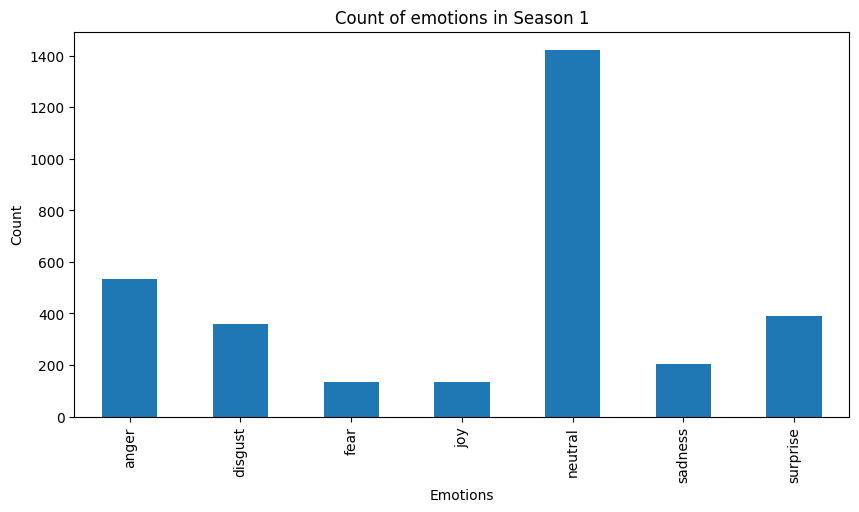

<Figure size 640x480 with 0 Axes>

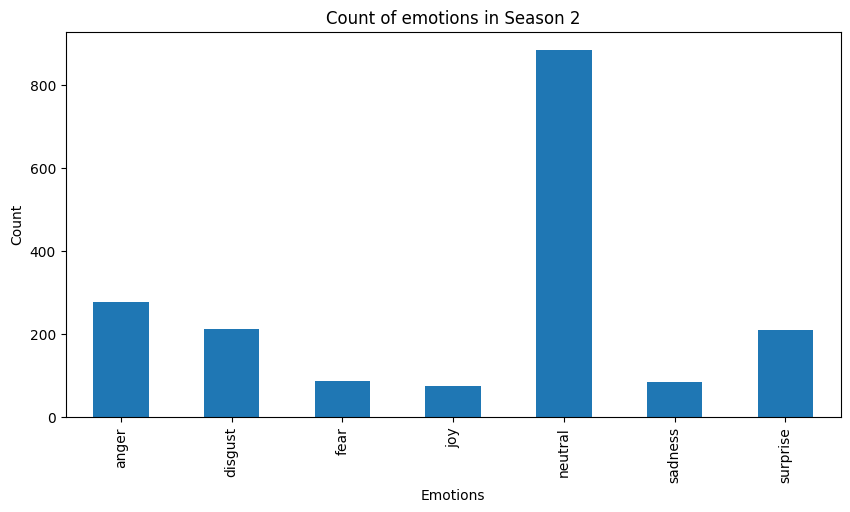

<Figure size 640x480 with 0 Axes>

In [33]:
#works

# Iterate through each season label ('Season 1', 'Season 2', ..., 'Season 8')
for season_label in df_small['Season'].unique():
    season_data = df_small[df_small['Season'] == season_label]
    plt.figure(figsize=(10, 5))
    ax = season_data['emotion'].value_counts().sort_index().plot(kind='bar', title=f'Count of emotions in {season_label}')
    ax.set_xlabel('Emotions')
    ax.set_ylabel('Count')
    plt.show()
    plt.savefig(f"../out/emotions_count_{season_label}.png")


In [ ]:
def rel_freq(x):
    freqs = [(value, x.count(value) / len(x)) for value in set(x)] 
    return freqs

In [13]:
#plot 2

#For each emotion label
#Plot the relative frequency of each emotion across all seasons
#want a histogram where x = 8 seasons (1 bar= 1 season) and y = relative frequency (from 0 to 1, should equal 1)
# 8 of those, 1 for each season

#x = season , y= relative frequency